# Réduction de dimension avec UMAP

Dans ce notebook, nous appliquons la méthode **UMAP** (*Uniform Manifold Approximation and Projection*) sur le dataset **MNIST**.

L’objectif est de :
- Réduire la dimension des données de 784 à 2 pour la **visualisation**.
- Comparer les résultats avec les autres techniques précédente (**t-SNE** et **PCA**).
- Évaluer la capacité d’UMAP à préserver la **structure globale et locale** des données.

---

## À propos d’UMAP

UMAP est une méthode de réduction de dimension **non-linéaire**, développée pour :
- Être **plus rapide** que t-SNE,
- Préserver à la fois la **structure globale** et **locale**,
- Être utilisée comme **prétraitement** pour d'autres tâches (clustering, classification).

---

**Références** :
- [Documentation officielle](https://umap-learn.readthedocs.io/en/latest/)
- [Article original](https://arxiv.org/abs/1802.03426)


In [5]:
# Librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Config
sns.set(style="whitegrid")
%matplotlib inline

In [4]:
# Chargement des données
df = pd.read_csv("../data/mnist.csv")

# Vérifier les noms de colonnes
print(df.columns[:10])

# Utiliser la première colonne comme label
label_col = df.columns[0]
X = df.drop(label_col, axis=1)
y = df[label_col]

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Index(['5', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8'], dtype='object')


In [6]:
# Importation de UMAP

import umap.umap_ as umap

# Création de l'instance UMAP
umap_2d = umap.UMAP(n_components=2, random_state=42)

# Réduction de dimension
X_umap = umap_2d.fit_transform(X)

print(f'Forme après réduction : {X_umap.shape}')


/home/performer/Bureau/ML/mnist-dimension-reduction/venv/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Forme après réduction : (69999, 2)


## Explication

Imaginons que nous avons une **matrice 4x4** représentant des images très simples (par exemple, des mini-chiffres écrits sur une grille 4x4). Chaque ligne de la matrice est une image, chaque colonne une caractéristique (pixel).

### Exemple de matrice (X) :
|      | Pixel 1 | Pixel 2 | Pixel 3 | Pixel 4 |
|------|---------|---------|---------|---------|
| Img1 |   0     |   1     |   0     |   1     |
| Img2 |   1     |   0     |   1     |   0     |
| Img3 |   0     |   0     |   1     |   1     |
| Img4 |   1     |   1     |   0     |   0     |

### Étape 1 : Création de l’instance UMAP

```python
umap_2d = umap.UMAP(n_components=2, random_state=42)
````

Ici, on crée un objet UMAP configuré pour projeter nos données dans un **espace à 2 dimensions**.

* `n_components=2` : on demande 2 dimensions en sortie (utile pour visualiser sur un plan).
* `random_state=42` : fixe le tirage aléatoire pour avoir des résultats reproductibles.

À ce stade, **aucune transformation n’a encore été faite**. On a juste un outil prêt à l'emploi.

---

### Étape 2 : Réduction de dimension

```python
X_umap = umap_2d.fit_transform(X)
```

C’est ici que la magie opère !

Cette ligne :

* **"fit"** → UMAP apprend la structure des données : il analyse quels points sont proches dans l’espace d’origine (ici, les lignes de notre matrice),
* **"transform"** → UMAP reconstruit ces relations dans un espace à 2 dimensions.

---

### Ce qu’il se passe concrètement avec notre mini-matrice

UMAP :

1. Compare chaque image avec les autres (Img1, Img2, etc.).
2. Évalue leur **proximité** (en mesurant la distance entre leurs vecteurs de pixels).
3. Crée un **graphe de voisinage** : les images proches seront reliées.
4. Optimise une projection 2D où ces relations sont **le mieux respectées possible**.

On obtient par exemple (valeurs fictives) :

|      | Dim 1 | Dim 2 |
| ---- | ----- | ----- |
| Img1 | 0.2   | 0.8   |
| Img2 | -0.3  | -0.6  |
| Img3 | -0.2  | 0.7   |
| Img4 | 0.5   | -0.5  |

---

### Étape 3 : Affichage de la forme

```python
print(f'Forme après réduction : {X_umap.shape}')
```

Cela affiche :

```
Forme après réduction : (4, 2)
```

Cela signifie qu’on a maintenant une nouvelle matrice avec 4 lignes (nos 4 images) et seulement **2 colonnes** (les dimensions réduites).
On est donc passé d’un espace à 4 dimensions (pixels) à un **espace visuel en 2D**, tout en gardant les relations entre images.

---

**Conclusion** : cette suite de lignes transforme un tableau de caractéristiques complexes en une version **simplifiée**, plus facile à visualiser, tout en gardant un maximum d'informations sur les **proximité entre les points**.


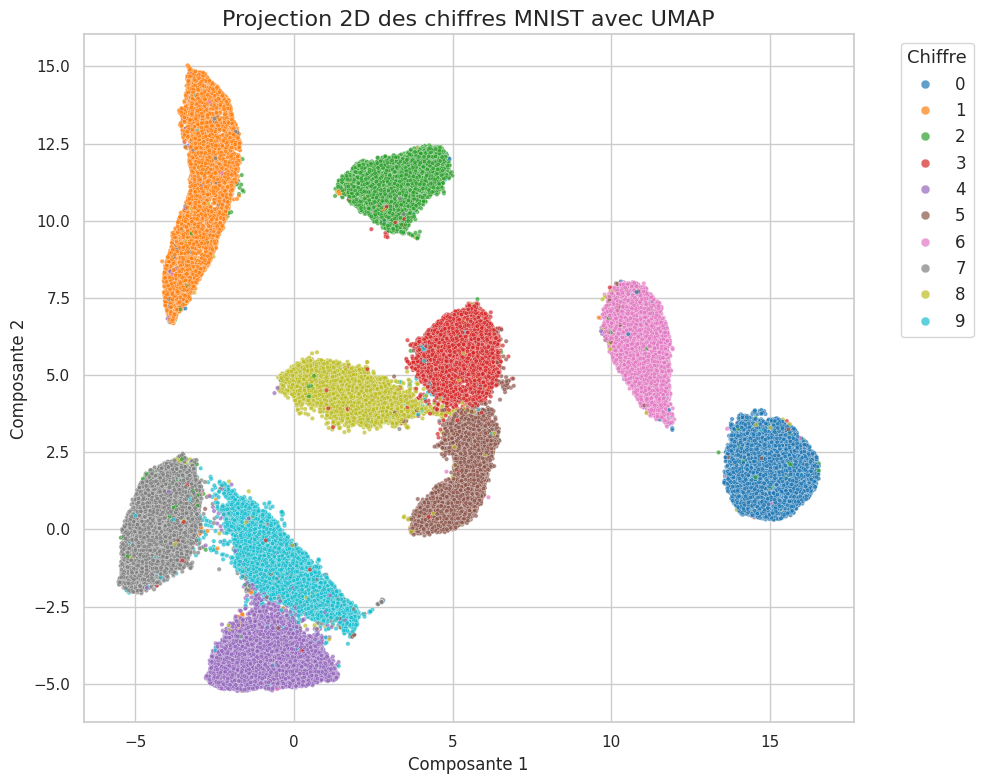

In [10]:
# Visualisation 2D des données réduites avec UMAP

plt.figure(figsize=(10, 8))
palette = sns.color_palette("tab10", 10)
scatter = sns.scatterplot(
    x=X_umap[:, 0], 
    y=X_umap[:, 1], 
    hue=y, 
    palette=palette,
    legend="full",
    s=10,
    alpha=0.7
)

plt.title("Projection 2D des chiffres MNIST avec UMAP", fontsize=16)
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")

handles, labels = scatter.get_legend_handles_labels()
plt.legend(
    handles=handles,
    labels=labels,
    title="Chiffre",
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    markerscale=2,
    fontsize=12,
    title_fontsize=13
)

plt.tight_layout()
plt.show()


# Interprétation

## Vue d'ensemble
La ficure ci-dessus montre une projection 2D des données MNIST utilisant l'algorithme UMAP (Uniform Manifold Approximation and Projection). elle nous permet ainsi de visualiser la structure des données haute-dimensionnelles dans un espace 2D.

## Analyse par chiffre

### Chiffres bien séparés
- **Chiffre 0 (bleu)** : Forme un cluster compact et bien défini dans la partie droite du graphique
- **Chiffre 1 (orange)** : Occupe une large zone allongée dans la partie supérieure gauche, formant le plus grand cluster
- **Chiffre 6 (rose/magenta)** : Cluster distinct et bien séparé dans la partie droite centrale
- **Chiffre 2 (vert)** : Cluster compact dans la partie supérieure centrale

### Chiffres partiellement groupés
- **Chiffre 4 (violet)** : Forme un cluster assez compact dans la partie inférieure gauche
- **Chiffre 7 (gris)** : Cluster dans la partie gauche, adjacente au chiffre 4
- **Chiffre 9 (cyan)** : Cluster allongé dans la partie inférieure gauche

- **Chiffre 3 (rouge)** : Zone centrale avec une certaine dispersion
- **Chiffre 5 (marron)** : Présent dans la zone centrale, parfois proche du chiffre 3
- **Chiffre 8 (jaune-vert)** : Situé dans la zone centrale gauche

## Observations importantes

### Séparation naturelle
UMAP a réussi à séparer naturellement la plupart des chiffres en clusters distincts, ce qui indique que les caractéristiques visuelles de chaque chiffre sont suffisamment différentes pour permettre une classification automatique.

### Zones de chevauchement
Certaines zones montrent un léger chevauchement entre les chiffres, notamment dans la région centrale où se trouvent les chiffres 3, 5, et 8. Cela suggère que ces chiffres partagent certaines caractéristiques visuelles qui peuvent rendre leur classification plus difficile.

### Structure géométrique
La disposition spatiale révèle les similarités morphologiques entre chiffres : les chiffres ayant des formes similaires tendent à être positionnés plus proche les uns des autres dans l'espace de projection.

Cette visualisation démontre l'efficacité d'UMAP pour révéler la structure sous-jacente des données MNIST et suggère qu'un classificateur devrait pouvoir distinguer efficacement ces différents chiffres manuscrits.